# Linear Regression

### Import data to R

In [1]:
#Set the working directory to the specific location of the files on your computer
#note: In this case, the working directory was set for my computer
setwd("/Users/Brandon/Harding_ML_Class")

In [2]:
#Import the data file oj into R
oj <- read.csv("oj.csv")

### The oj datset is data collected from Dominick's Grocery Store chain from Chicago. Let's get a feel for the oj dataset by viewing a few rows, calculating some summary statistics, and plotting a few charts.

In [3]:
#View the first few rows of oj
head(oj)

sales,price,brand,feat
8256,3.87,tropicana,0
6144,3.87,tropicana,0
3840,3.87,tropicana,0
8000,3.87,tropicana,0
8896,3.87,tropicana,0
7168,3.87,tropicana,0


In [4]:
#View the structure of oj
str(oj)

'data.frame':	28947 obs. of  4 variables:
 $ sales: num  8256 6144 3840 8000 8896 ...
 $ price: num  3.87 3.87 3.87 3.87 3.87 3.87 3.29 3.29 3.29 3.29 ...
 $ brand: Factor w/ 3 levels "dominicks","minute.maid",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ feat : int  0 0 0 0 0 0 0 0 0 0 ...


In [5]:
#View some summary statistics for oj
summary(oj)

     sales            price               brand           feat       
 Min.   :    64   Min.   :0.520   dominicks  :9649   Min.   :0.0000  
 1st Qu.:  4864   1st Qu.:1.790   minute.maid:9649   1st Qu.:0.0000  
 Median :  8384   Median :2.170   tropicana  :9649   Median :0.0000  
 Mean   : 17312   Mean   :2.282                      Mean   :0.2373  
 3rd Qu.: 17408   3rd Qu.:2.730                      3rd Qu.:0.0000  
 Max.   :716416   Max.   :3.870                      Max.   :1.0000  

In [6]:
#View the categories for the types of oj brands
levels(oj$brand)

[1] "dominicks"   "minute.maid" "tropicana"

### Create a boxplot of the log price of a brand versus the brand and a scatter plot of the brand's log price versus log of sales.

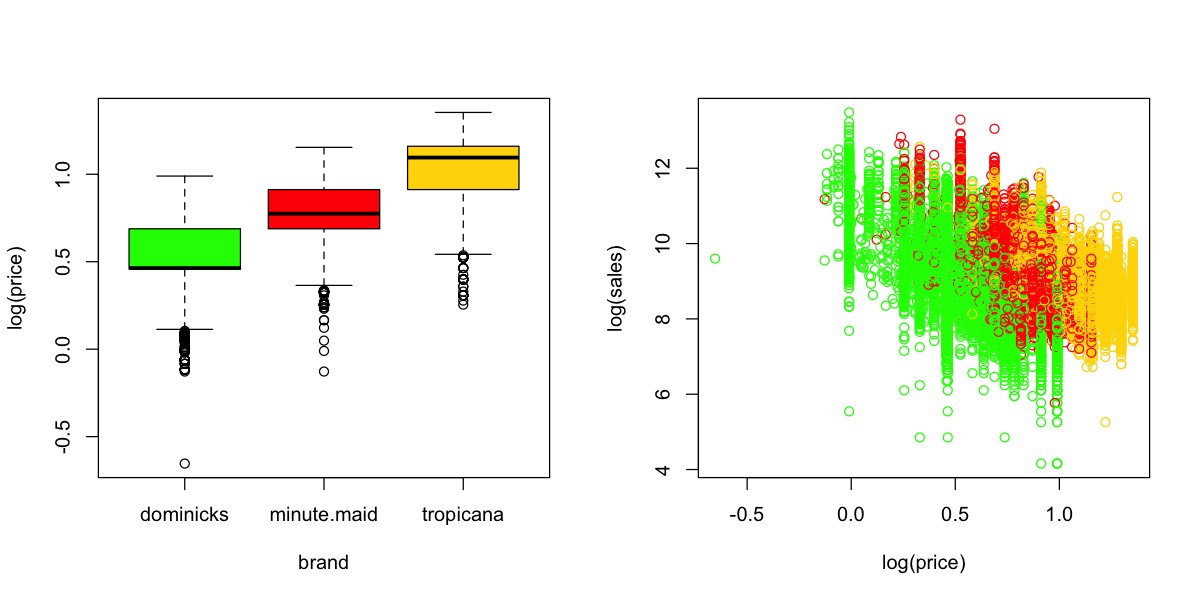

In [7]:
#set graphical parameters (this is only needed for jupyter notebooks)
options(repr.plot.width = 10, repr.plot.height = 5)

#Designate three colors for the three brands
brandcol <- c("green","red","gold")
#Place graphs side by side
par(mfrow=c(1,2))
#Plot the boxplot
plot(log(price) ~ brand, data=oj, col=brandcol)
#Plot the scatterplot
plot(log(sales) ~ log(price), data=oj, col=brandcol[oj$brand])

## Regression Example 1

Execute the following regression in which log of sales is regressed on brand and log of price. The form is as follows

## \begin{align} \log(sales) & = \alpha_{brand} + \beta log(price) + \epsilon \end{align}


In [8]:
#Perform regression uses R's glm function
reg <- glm(formula = log(sales) ~ log(price) + brand #type regression to be executed in formula
           ,data=oj #specify the data to use for computation under the data
          )

In [9]:
#For the entire model summary
summary(reg)

#NOTE: The Dominick's brand indicator is the refernce level.
#      Thus, when the minute.maid and tropicana indicators are 0, we are referring to Daminick's brand 


Call:
glm(formula = log(sales) ~ log(price) + brand, data = oj)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.3152  -0.5246  -0.0502   0.4929   3.5088  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      10.82882    0.01453  745.04   <2e-16 ***
log(price)       -3.13869    0.02293 -136.89   <2e-16 ***
brandminute.maid  0.87017    0.01293   67.32   <2e-16 ***
brandtropicana    1.52994    0.01631   93.81   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.6296804)

    Null deviance: 30079  on 28946  degrees of freedom
Residual deviance: 18225  on 28943  degrees of freedom
AIC: 68765

Number of Fisher Scoring iterations: 2


In [10]:
#For only the regression coeffcients
beta_reg <- coef(reg)
beta_reg

(Intercept)       log(price) brandminute.maid   brandtropicana 
      10.8288216       -3.1386914        0.8701747        1.5299428

Let's work to breakdown the glm function to see how it operates.

In [11]:
#The first step generates a model matrix (aka design matrix) that defines the numeric inputs for x
X <- model.matrix( ~ log(price) + brand #use right hand side of the regression to specify how to fill matrix
                  ,data=oj #specify data to fill matrix
                 )

#note that for categorical variables like brand, dummy columns (aka indicators variables) will be created

In [12]:
##View a few observations of x to compare with the original oj dataset
X[c(100,200,300),]
oj[c(100,200,300),]

,(Intercept),log(price),brandminute.maid,brandtropicana
100,1,1.1600209,0,1
200,1,1.0260416,1,0
300,1,0.3293037,0,0


,sales,price,brand,feat
100,4416,3.19,tropicana,0
200,5440,2.79,minute.maid,0
300,51264,1.39,dominicks,1


#### Recall that matrix algebra calcultes the coefficients in OLS as
#### \begin{align} \hat{\beta} & = (X'X)^{-1} X' y \end{align}

In [13]:
##Calculate regression coefficients using matrix algebra
#note that %*% is matrix multiplication in R (refer to https://www.statmethods.net/advstats/matrix.html for more info on R matrix algebra)

#Denote y as log of sales
y <- log(oj$sales)

#Find X transpose
X_prime <- t(X)

#Find inverse of (X'X)
XX_inverse <- solve(X_prime%*%X)

#Solve for beta coefficients
betas_matrix <- XX_inverse%*%X_prime%*%y

In [14]:
#Compare the betas_matrix above with those found through glm
betas_matrix
coef(reg)

(Intercept),10.8288216
log(price),-3.1386914
brandminute.maid,0.8701747
brandtropicana,1.5299428


(Intercept)       log(price) brandminute.maid   brandtropicana 
      10.8288216       -3.1386914        0.8701747        1.5299428

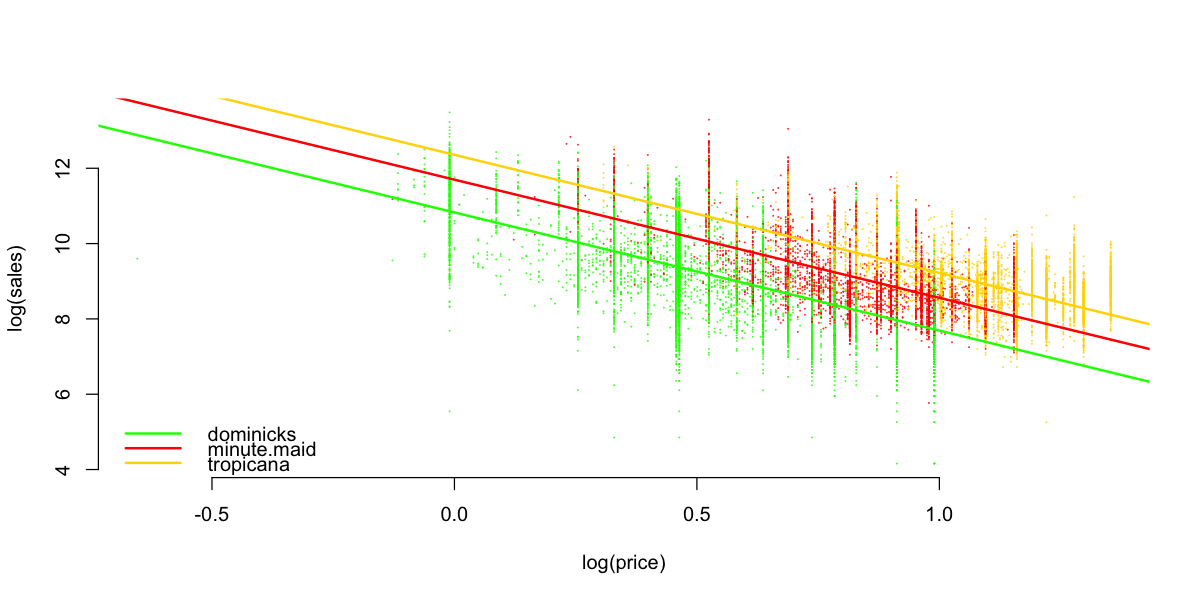

In [15]:
###Plot the regression lines

##Plot scatterplot of log(price) versus log(sales)
plot(log(sales) ~ log(price), data=oj, col=brandcol[oj$brand],
     cex=.1, pch=20, bty="n")

##Add regression lines
#Designate three colors for the three brands
brandcol <- c("green","red","gold")
#Plot regression lines
abline(a=beta_reg[1], b=beta_reg[2], col=brandcol[1], lwd=2)
abline(a=beta_reg[1]+beta_reg[3], b=beta_reg[2], col=brandcol[2], lwd=2)
abline(a=beta_reg[1]+beta_reg[4], b=beta_reg[2], col=brandcol[3], lwd=2)
#Add legend
legend("bottomleft", bty="n", lwd=2, col=brandcol, legend=levels(oj$brand))

## Regression Example 2

Execute the following regression in which log of sales is regressed on brand, log of price, and their interaction. The form is as follows

## \begin{align} \log(sales) & = \alpha_{brand} + \beta*log(price) + \gamma*log(price)*brand + \epsilon \end{align}


In [16]:
##Perform the regression
#note that * also adds the main effects automatically
reg_interact = glm(log(sales) ~ log(price)*brand, data=oj)

In [17]:
#View the regression coefficients
coef(reg_interact)

(Intercept)                  log(price) 
                10.95468173                 -3.37752963 
           brandminute.maid              brandtropicana 
                 0.88825363                  0.96238960 
log(price):brandminute.maid   log(price):brandtropicana 
                 0.05679476                  0.66576088

In [18]:
##As a sidenote, look to compare the coefficient on log(price)

#without log(price) and brand interaction
beta_reg[2]
#with interaction
beta_interact <- coef(reg_interact)
beta_interact

log(price) 
 -3.138691

(Intercept)                  log(price) 
                10.95468173                 -3.37752963 
           brandminute.maid              brandtropicana 
                 0.88825363                  0.96238960 
log(price):brandminute.maid   log(price):brandtropicana 
                 0.05679476                  0.66576088

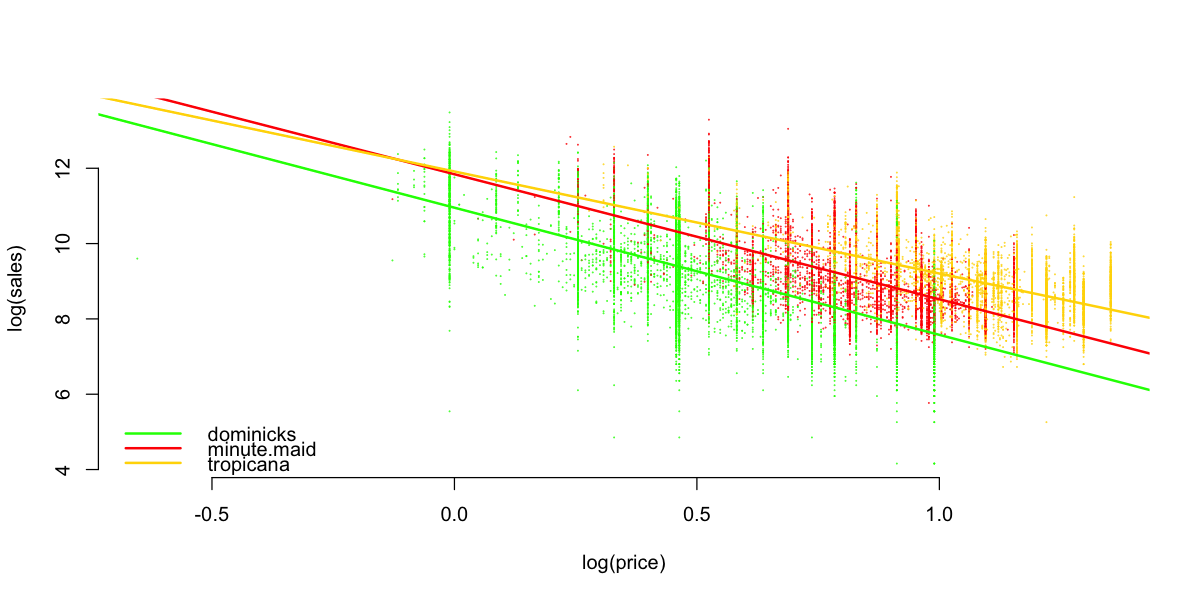

In [19]:
###Plot the regression lines

##Plot scatterplot of log(price) versus log(sales)
plot(log(sales) ~ log(price), data=oj, col=brandcol[oj$brand],
     cex=.1, pch=20, bty="n")

##Add regression lines
#Designate three colors for the three brands
brandcol <- c("green","red","gold")
#Plot regression lines
abline(a=beta_interact[1], b=beta_interact[2], col=brandcol[1], lwd=2)
abline(a=beta_interact[1]+beta_interact[3], b=beta_interact[2]+beta_interact[5], col=brandcol[2], lwd=2)
abline(a=beta_interact[1]+beta_interact[4], b=beta_interact[2]+beta_interact[6], col=brandcol[3], lwd=2)
#Add legend
legend("bottomleft", bty="n", lwd=2, col=brandcol, legend=levels(oj$brand))

## Regression Example 3

Execute the following regression in which log of sales is regressed on brand, log of price, feat (refers whther the brand had an advertisement/promotion), and their interactions. The form is as follows

\begin{align} \log(sales) & = \alpha_{brand} + \beta [log(price)] + \gamma [log(price)*brand] + \lambda [brand*feat] + \theta [log(price)*brand*feat] + \epsilon \end{align}



In [20]:
#Perform the regression
ojreg <- glm(log(sales) ~ log(price)*brand*feat, data=oj)

In [21]:
#View the coefficients
summary(ojreg)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),10.40657579,0.02335052,445.667820,0.000000e+00
log(price),-2.77415436,0.03882923,-71.445007,0.000000e+00
brandminute.maid,0.04720317,0.04662884,1.012317,3.113949e-01
brandtropicana,0.70794089,0.05079663,13.936767,5.256370e-44
feat,1.09440665,0.03810418,28.721434,6.698268e-179
log(price):brandminute.maid,0.78293210,0.06140413,12.750480,3.900718e-37
log(price):brandtropicana,0.73579299,0.05683601,12.945893,3.165581e-38
log(price):feat,-0.47055331,0.07409134,-6.350989,2.171102e-10
brandminute.maid:feat,1.17294361,0.08195578,14.311908,2.654270e-46
brandtropicana:feat,0.78525237,0.09874799,7.952084,1.900425e-15


For computation of elasticities, recall that elasticity is

### \begin{align} Elasticity = \frac{\frac{\partial y}{y}}{\frac{\partial x}{x}} = \frac{\partial y}{\partial x} \frac{x}{y} \end{align}

and that the equation for regression above is

\begin{align} \log(sales) & = \alpha_{brand} + \beta [log(price)] + \gamma [log(price)*brand] + \lambda [brand*feat] + \theta [log(price)*brand*feat] + \epsilon \end{align}

Therefore, we can find the elaticty for all brand and feat combinations by solving

#### \begin{align} Elasticity = \frac{\partial sales}{\partial price} \frac{price}{sales} \end{align}

If we first solve for partial sales divided by partial price, take the derivative of the exponential transformation of log of sales such that

#### \begin{align} \frac{\partial sales}{\partial price} & = e^{u} (\frac{\partial u}{\partial price}) \end{align}
such that
\begin{align}
u & = \alpha_{brand} + \beta [log(price)] + \gamma [log(price)*brand] + \lambda [brand*feat] + \theta [log(price)*brand*feat] + \epsilon
\end{align}

We see that the partial derivative of u with rspect to price is

#### \begin{align} \frac{\partial u}{\partial price} & = \frac{\beta}{price} + \frac{\gamma*brand}{price} + \frac{\theta*brand*feat}{price} \end{align}

Thus, the elasticity for price given a set of brand and feat specifications is

#### \begin{align} Elasticity = \frac{\partial sales}{\partial price} \frac{price}{sales} = e^{u} (\frac{\beta}{price} + \frac{\gamma*brand}{price} + \frac{\theta*brand*feat}{price})*(\frac{price}{sales}) \end{align}

We see that u is equivalent to log(sales) which is the regression equation we performed, thus e^u is the exponential transofrmation of log(sales) wihich is equivalent to sales [e^u = sales]. So elasticty for  given brand and feat combination is


### \begin{align} Elasticity = \frac{\partial sales}{\partial price} \frac{price}{sales} = \beta + (gamma*brand) + (\theta*brand*feat) \end{align}

where gamma and theta refer to the specific coefficient for brand and feat combination.

In [22]:
##Calculation of elasticities

#Assign the coefficients of the ojreg to an object
b <- coef(ojreg)

#Create a list to display the elasticities
elasticities_ojreg <- list("Dominick's and not featured" = b["log(price)"] 
                     ,"Minute.maid and not featured" = b["log(price)"] + b["log(price):brandminute.maid"]
                     ,"Tropicana and not featured" = b["log(price)"] + b["log(price):brandtropicana"] 
                     ,"Dominick's and featured" = b["log(price)"] + b["log(price):feat"]
                     ,"Minute.maid and featured" = b["log(price)"] + b["log(price):brandminute.maid"] + b["log(price):feat"] + b["log(price):brandminute.maid:feat"]
                     ,"Tropicana and featured" = b["log(price)"] + b["log(price):brandtropicana"] + b["log(price):feat"] + b["log(price):brandtropicana:feat"]


)
elasticities_ojreg


$`Dominick's and not featured`
log(price) 
 -2.774154 

$`Minute.maid and not featured`
log(price) 
 -1.991222 

$`Tropicana and not featured`
log(price) 
 -2.038361 

$`Dominick's and featured`
log(price) 
 -3.244708 

$`Minute.maid and featured`
log(price) 
 -3.570999 

$`Tropicana and featured`
log(price) 
 -3.495056

#### Let's return for moment to regression example 2 that excludes the presence of feat in the regression. Thus, the calculation for price elasticity given a brand is

#### \begin{align} Elasticity = \frac{\partial sales}{\partial price} \frac{price}{sales} = \beta + (gamma*brand) \end{align}

The calculation of the price elasticities for regression two given a brand are as follows:

In [23]:
##Regression 2 price elasticities

#Assign the coefficients of the reg_interact to an object
b <- coef(reg_interact)

#Create a list to display the elasticities
elasticities_reg_interact <- list("Dominick's" = b["log(price)"] 
                     ,"Minute.maid" = b["log(price)"] + b["log(price):brandminute.maid"]
                     ,"Tropicana" = b["log(price)"] + b["log(price):brandtropicana"] 
                     )
elasticities_reg_interact



$`Dominick's`
log(price) 
  -3.37753 

$Minute.maid
log(price) 
 -3.320735 

$Tropicana
log(price) 
 -2.711769

#### Notice that the price elasticities for minute.maid and tropicana differ significantly under regression 2 (without the inclusion of feat) while the price elasticities for minute.maid and tropicana with no feature under regression 3 (with inclusion of feat) are extremely similar.

#### This is the result of a _confounding_ between advertisement (feat) and brand effects. The following chart will show that minute.maid was featured significantly more than tropicana.

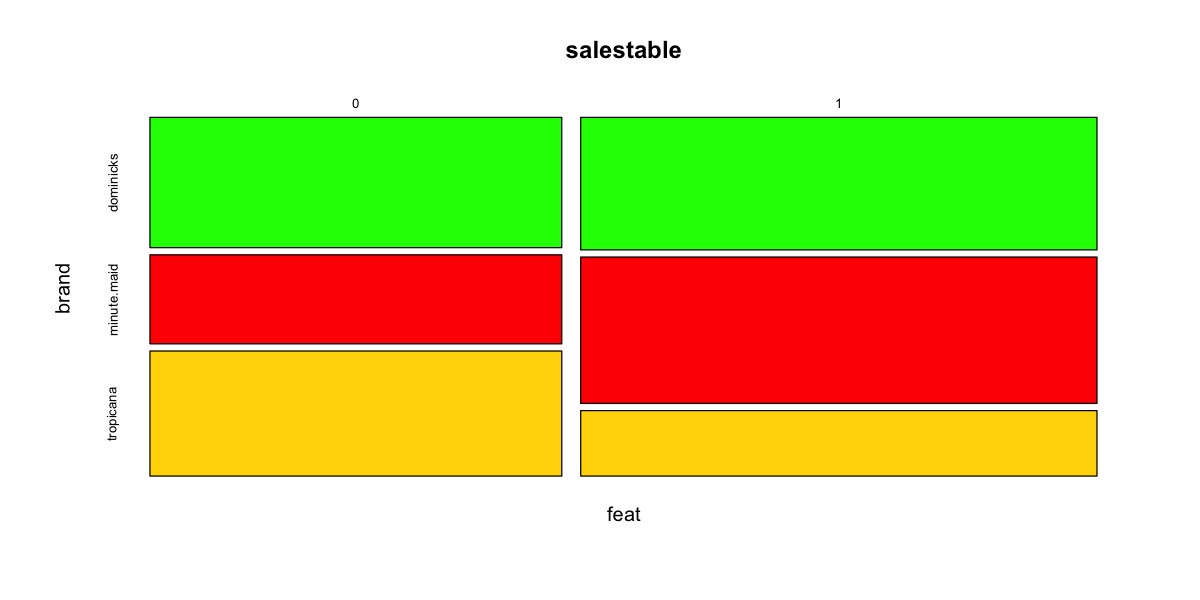

In [24]:
#Plot mosaic of amount of advertisement by brand (note: feat = 1 is advertisement)
oj$logmove <- log(oj$sales)
salestable <- tapply(exp(oj$logmove), oj[,c("feat","brand")], sum)
mosaicplot(salestable,col=brandcol)

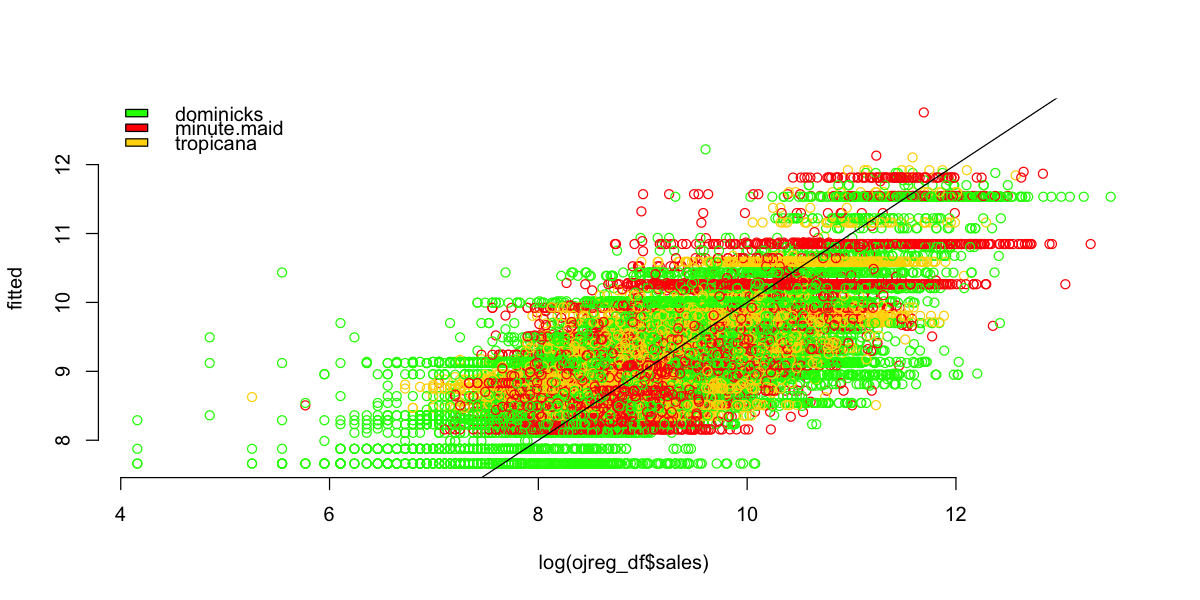

In [25]:
### fit plots and R^2 

##Create new dataframe combining oj and the ojreg fitted values
#Create a copy of oj
ojreg_df <- oj
#Add the fitted values to the ojreg_df
ojreg_df$fitted <- ojreg$fitted.values

##Plot ojreg log(sales) versus ojreg fitted values
# (the 'bty="n"' option removes boxes around your plot)
# note that the fitted values are already log transformed
plot(fitted ~ log(ojreg_df$sales), data=ojreg_df, col=brandcol[ojreg_df$brand], bty="n")
abline(a=0,b=1)#  add a line with slope 1, intercept 0
legend("topleft",legend=levels(ojreg_df$brand),fill=brandcol, bty="n")
#cor(ojreg$fitted,oj$logmove)^2


# Logistic Regression

Logistic regression is a technique used for modeling binary response variables (a dependent variable that is 0/1, YES/NO, etc).

## Logistic Regression Example 1: Spam Filter

Using the spam.csv file, we will attempt to create a filter to identify whther an email is spam or is legitimate. The spam file contains 4600 email with roughly 1800 specified as spam.

In [26]:
#Set the working directory to the specific location of the files on your computer
#note: In this case, the working directory was set for my computer
setwd("/Users/Brandon/Harding_ML_Class")

#set graphical parameters (this is only needed for jupyter notebooks)
options(repr.plot.width = 10, repr.plot.height = 5)

In [27]:
#Import the data file spam into R
email <- read.csv("spam.csv")

In [28]:
#View the structure of the dataset
str(email)

'data.frame':	4601 obs. of  58 variables:
 $ word_make                 : int  0 1 1 0 0 0 0 0 1 1 ...
 $ word_address              : int  1 1 0 0 0 0 0 0 0 1 ...
 $ word_all                  : int  1 1 1 0 0 0 0 0 1 1 ...
 $ word_3d                   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ word_our                  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ word_over                 : int  0 1 1 0 0 0 0 0 0 1 ...
 $ word_remove               : int  0 1 1 1 1 0 0 0 1 1 ...
 $ word_internet             : int  0 1 1 1 1 1 0 1 0 0 ...
 $ word_order                : int  0 0 1 1 1 0 0 0 1 1 ...
 $ word_mail                 : int  0 1 1 1 1 0 1 0 1 0 ...
 $ word_receive              : int  0 1 1 1 1 0 1 0 1 0 ...
 $ word_will                 : int  1 1 1 1 1 0 1 0 1 1 ...
 $ word_people               : int  0 1 1 1 1 0 0 0 0 1 ...
 $ word_report               : int  0 1 0 0 0 0 0 0 0 0 ...
 $ word_addresses            : int  0 1 1 0 0 0 0 0 0 1 ...
 $ word_free                 : int  1 1 1 1 1 0 1 0 0 0 ..

In [29]:
#Performa logistic regression with spam as the respons evariable
spammy <- glm(spam ~ . #fits model with all available variables in the data frame specified
              ,data=email #specifies the data frame used to perform the regression
              ,family='binomial' #indicates that the response variable is binary
             )
## you don't need to worry about this warning.  
## It says that some covariates are nearly perfect predictors.

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [30]:
##Let's look at some coefficients

#the coefficients
b <- coef(spammy)
exp(b["word_george"]) # George => !SPAM
exp(b["word_free"]) # Free => SPAM

#NOTE: George was just some guy that worked in a CS department.
#      The spam.csv file is from the 90's when spammers were less sophisticated,
#       thus using a person's name meant it was unlikely to be spam

word_george 
0.003089205

word_free 
 4.677229

In [31]:
##Further on the George point, here are a few tables that illustrate it in more detail

#Table of y-axis: Yes spam | Not spam and x-axis: Includes Word George | George Not Mentioned
table(email$spam, email$word_george)

#Table of y-axis: Yes spam | Not spam and x-axis: Includes Word Free | Free Not Mentioned
table(email$spam, email$word_free)

   
       0    1
  0 2016  772
  1 1805    8

   
       0    1
  0 2536  252
  1  824  989

In [32]:
##To make predictions with a binary logistic regression

#For log-odds predictions using observation 1 and 4000 from email dataset
predict(spammy, newdata=email[c(1,4000),])

#For probability of spam predictions as a probability
predict(spammy, newdata=email[c(1,4000),], type="response")


1      4000 
 2.029963 -1.726788

1      4000 
0.8839073 0.1509989

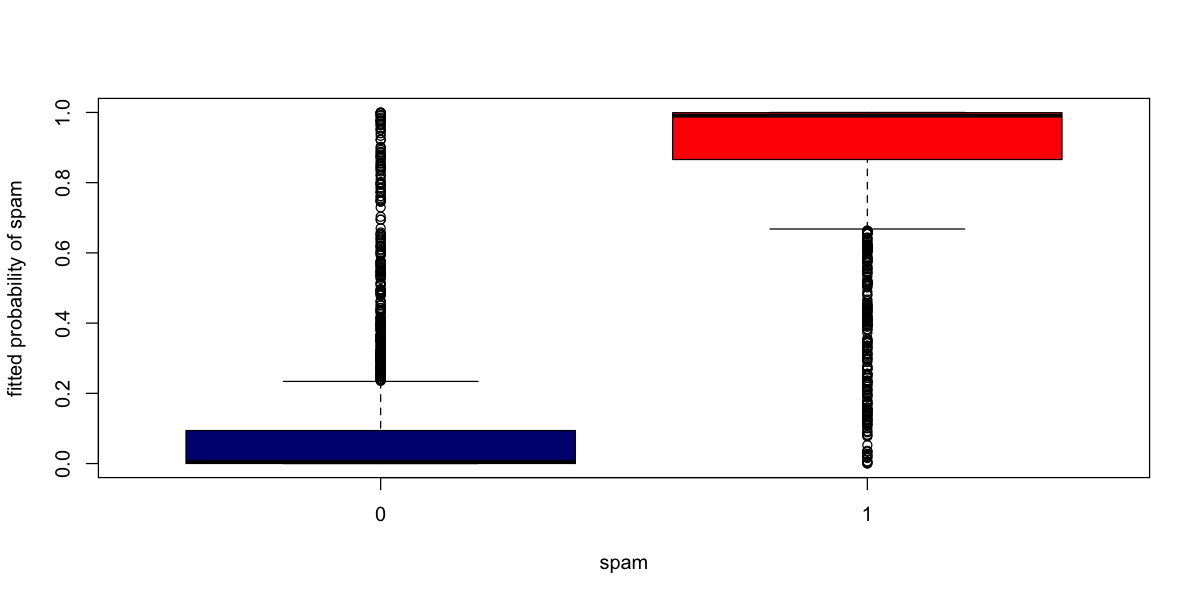

In [33]:
#Create a boxplot of the model's fitted values
boxplot(spammy$fit~email$spam,
     xlab="spam", ylab=c("fitted probability of spam"),
     col=c("navy","red"))

## Deviance and Likelihood

Let's look to replicate the calculation of null and residual deviance from the glm function. Fpor this, we will use the deviance package.

In [34]:
#Load the deviance.R file
source("deviance.R")

In [35]:
##Calculate residual deviance

#Obtain regression predicted probabilities of spam
pspam <- predict(spammy, newdata=email, type="response")

#Calculate residual deviance
D <- deviance(y=email$spam, pred=pspam, family="binomial")
D

[1] 1548.66

In [36]:
##Calculate null deviance

#For the marginal prob(spam) (note an email is specified as spam when spam = 1)
ybar <- mean(email$spam==1)
#Null deviance calculation
D0 <- deviance(y=email$spam, pred=ybar, family="binomial")
D0

[1] 6170.153

In [37]:
#Compare D and D0 above with the glm regression deviance calculations
s_spammy <- summary(spammy)

#Residual deviance
s_spammy$deviance
#Null deviance
s_spammy$null.deviance

[1] 1548.66

[1] 6170.153

In [38]:
#Calculate R-squared
1 - D/D0

[1] 0.7490079

# Regression Uncertainty

The standard errors calculated by R's glm function are not robust to model misspecification (meaning if heteroskedasticity is present). Therefore, we can make use of nonparametric methods to calculate robust standard errors such as Bootstrap and Huber-White Heteroskedastic Consistent (HC) Standard Errors.

In [39]:
#Import the airquality data set (this is found inside of R)
data(airquality)

#Fit a linear regression of Ozone against the available regressors
fit <- lm(Ozone ~ ., data=airquality)

In [40]:
#Take a look at the wind coefficient
summary(fit)$coef["Wind",]

Estimate    Std. Error       t value      Pr(>|t|) 
-3.318444e+00  6.445095e-01 -5.148789e+00  1.231276e-06

To obtain HC standard errors:

In [41]:
##For HC standard errors

#Import AER package
library(package = "AER")

#Use a fitted glm or lm to estimate the HC covariance matrix
bvar <- vcovHC(fit)

#View HC covariance matrix rounded to a single decimal place
round(bvar,1)

Loading required package: car
Loading required package: carData
Loading required package: lmtest
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich
Loading required package: survival


,(Intercept),Solar.R,Wind,Temp,Month,Day
(Intercept),432.9,0.1,-13.3,-3.6,-3.2,0.3
Solar.R,0.1,0.0,0.0,0.0,0.0,0.0
Wind,-13.3,0.0,0.8,0.1,-0.2,-0.1
Temp,-3.6,0.0,0.1,0.1,-0.1,0.0
Month,-3.2,0.0,-0.2,-0.1,1.8,0.0
Day,0.3,0.0,-0.1,0.0,0.0,0.1


In [42]:
#To get the HC standard error for the wind coefficient
hc_sd <- sqrt(bvar["Wind","Wind"])
hc_sd

[1] 0.9128877

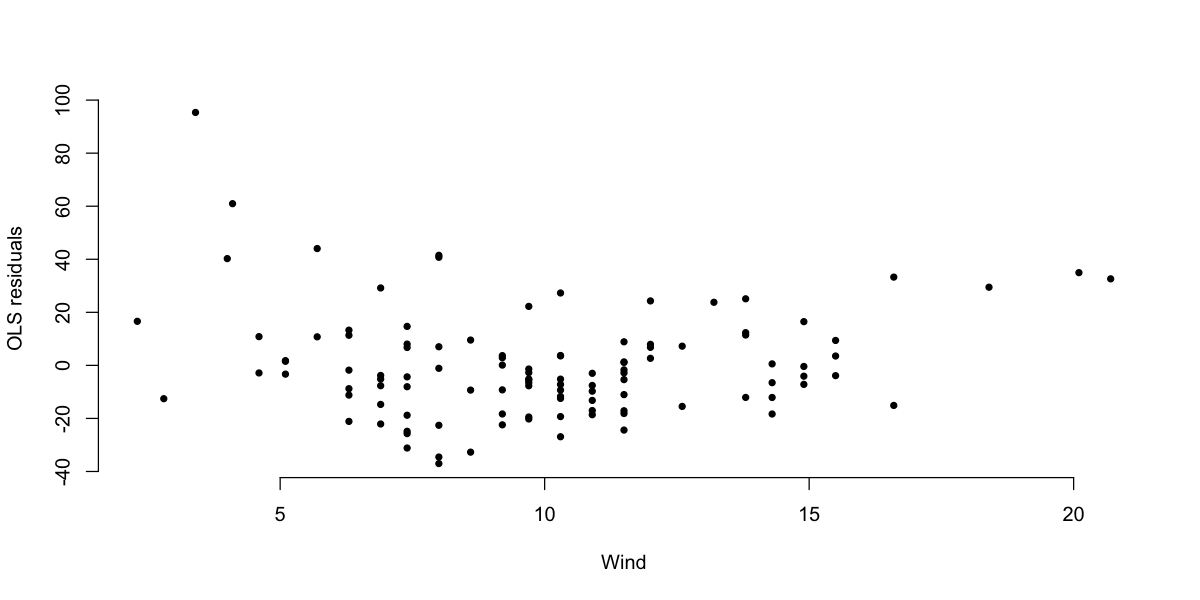

In [43]:
#Let's plot the ols residuals for the airquality regression to view the heteroskedasticity
plot(na.omit(airquality)$Wind, fit$residuals, pch=20, bg=8, bty="n",
     xlab="Wind", ylab="OLS residuals")

### It turns out that the HC standard errors actually approximate the Bootstrap standard errors. To find the Bootstrap standard errors:

In [44]:
##Bootstrap standard error for wind coefficient

#Set number of samples to be taken
B <- 10000

#Create an empty vector of length B for storage of bootstrap regression coefficients
beta <- vector(length=B)

#get number of rows of airquality dataset
n <- nrow(airquality)

#Contsruct a for-loop to fit regressions to samples of the dataset and store the wind coefficient
for(b in 1:B){
  bs = sample.int(n,n,replace=TRUE)
  bsfit <- lm(Ozone ~., data=airquality, subset=bs)
  beta[b] <- coef(bsfit)["Wind"]
}

#Take standard deviation of the vector of wind coefficients calculated through the bootstrap for standard error of wind coefficient
sd(beta)

[1] 0.8773212

### Plot sampling distributions for the wind coefficient based on:
1. OLS and the "vanilla" standard errors [standard errors calculated under the assumption of homoskedaticity]
2. OLS and the HC standard error
3. OLS Bootstrap

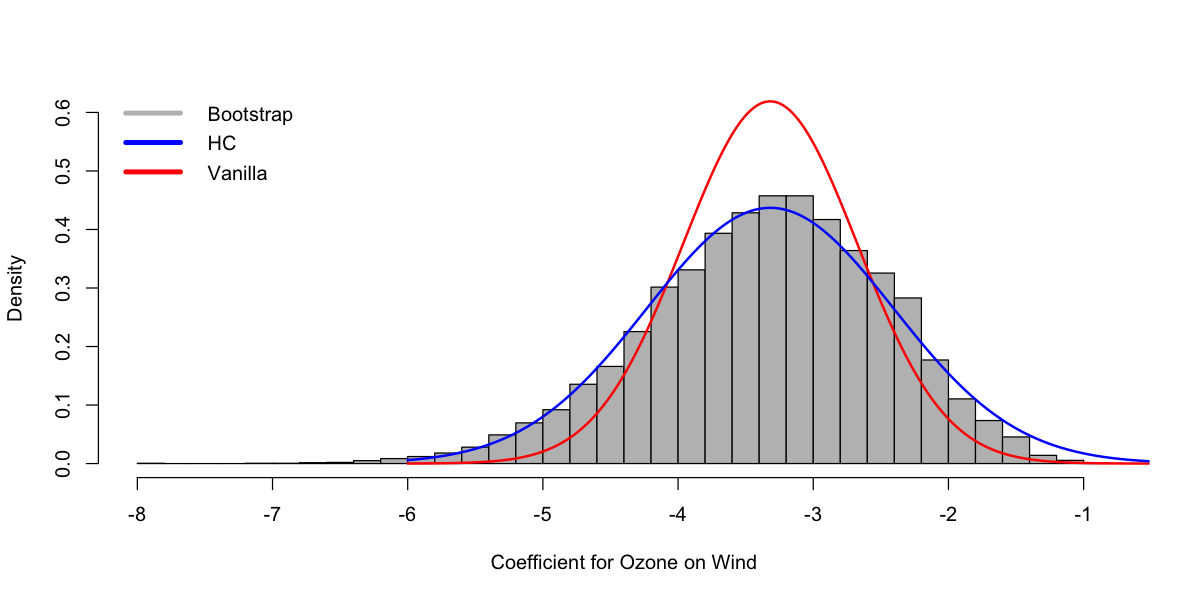

In [45]:
###Create plot for comparison

##Create the base plot of the bootstrapped wind coefficients
hist(beta, col=8, main="", 
  xlab="Coefficient for Ozone on Wind", 
  freq=FALSE,ylim=c(0,0.6),breaks=25)

##Overlay histogram with the OLS and "vanilla" standard error distribution

#Pull the wind regression coefficient and standard error from the lm summary
coef <- summary(fit)$coef["Wind",1:2]
#Create a vector of values to feed into distrubition for plotting
calc_values <- seq(-6,5,length=500)
#Calculate the resulting pdf values for the vanilla sampling distribution
vanilla_pdf <- dnorm(calc_values,coef[1],coef[2])
#Add vanilla sampling distribution to histogram
lines(calc_values,vanilla_pdf,col=2,lwd=2)

##Overlay histogram with the OLS and HC standard error distribution

#Calculate the resulting pdf values for the sampling distribution with HC standard errors
hc_pdf <- dnorm(calc_values,coef[1],hc_sd)
#Add sampling distribution with HC standard errors to histogram
lines(calc_values,hc_pdf,col=4,lwd=2)

##Add legend to graph
legend("topleft",col=c(8,"white",4,"white",2),lwd=4, 
  legend=c("Bootstrap","",
           "HC","",
           "Vanilla"),bty="n")

# Space and Time

This section will work through regression techniques that deal with trends in time and space as swell as auto-regression, dependence between neighboring outcomes.

## Space and Time Regression Example 1

Using the airline.csv dataset, we can build a regression to analyze the number of monthly passengers overtime. We will look to construct the regression with a linear time trend and monthly fixed effects:

### \begin{align} log(y_t) & = \alpha + \beta_t t + \beta_{m_t} + \epsilon_t \end{align}

In [46]:
#Import the airline.csv dataset
airline <- read.csv("airline.csv")

#View structure of the dataset
str(airline)

'data.frame':	144 obs. of  3 variables:
 $ Year      : int  49 49 49 49 49 49 49 49 49 49 ...
 $ Month     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Passengers: int  112 118 132 129 121 135 148 148 136 119 ...


In [47]:
##Sidenote on Dates in R

# non-essential, but you can tell R you are working with dates
# sprintf is a function for creating strings from numbers.
# the first of every month; there's a whole syntax to this...
dmy <- sprintf("01-%d-19%d", airline$Month,  airline$Year)

# as.Date creates a Date classed variable
# see help(as.Date) and help(strptime)
# this stuff can quickly get complicated...
date <- as.Date(dmy, format="%d-%m-%Y") 


#### Before performing the regression above, let's take a look at the plot of monthly passengers overtime to view why we will use a log-linear model. You will notice that the monthly passengers plotted over time will showcase a linear upwards trend, yet the monthly oscillations in passenger counts also increases over time. A second plot of the logrithmic transformation of monthly passengers over time will even out the oscillations.


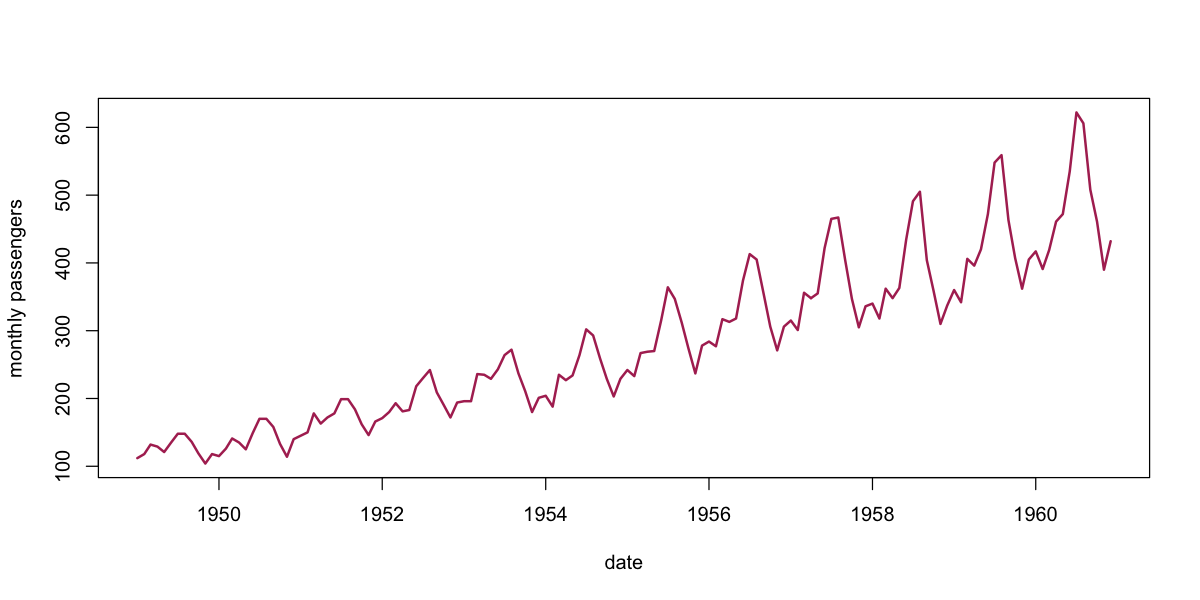

In [48]:
#Plot monthly passengers over time (no log transformation)
passengers <- airline$Passengers
plot(date, passengers,ylab="monthly passengers", type="l", col="maroon", lwd=2)

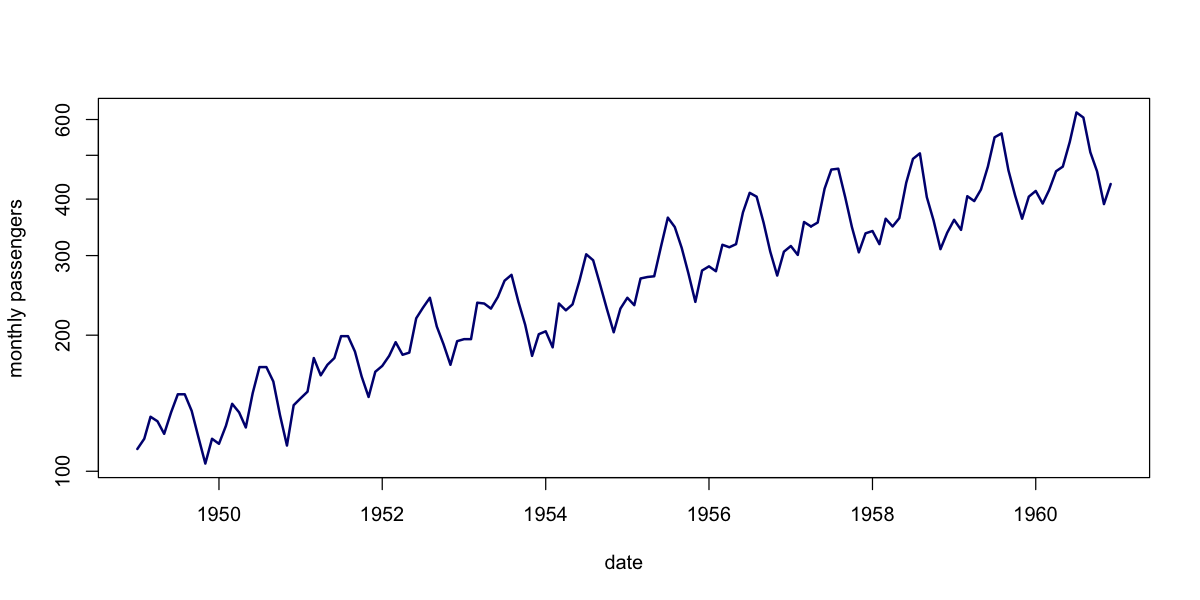

In [49]:
#Plot log transform of monthly lassengers over time
plot(date, passengers,  log="y" #the use of log="y" performs the log transofrmation in the plot
     ,ylab="monthly passengers", type="l", col="navy", lwd=2)

### Now let's run the regression from above.

In [50]:
## From here it is easier to not work with fancy Date objects
## note these are both 'month' variables; 
## the first is categorical, the second numeric
month <- factor(airline$Month)
time <- (airline$Year-min(airline$Year))*12 + airline$Month


In [51]:
##Fit the regression 
# you could get fancier and group months together (summer, holidays),
# but we'll assume you have enough data that this doesn't make a difference.
air <- glm(log(passengers) ~ time + month)
summary(air)


Call:
glm(formula = log(passengers) ~ time + month)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.156370  -0.041016   0.003677   0.044069   0.132324  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.7267804  0.0188935 250.180  < 2e-16 ***
time         0.0100688  0.0001193  84.399  < 2e-16 ***
month2      -0.0220548  0.0242109  -0.911  0.36400    
month3       0.1081723  0.0242118   4.468 1.69e-05 ***
month4       0.0769034  0.0242132   3.176  0.00186 ** 
month5       0.0745308  0.0242153   3.078  0.00254 ** 
month6       0.1966770  0.0242179   8.121 2.98e-13 ***
month7       0.3006193  0.0242212  12.411  < 2e-16 ***
month8       0.2913245  0.0242250  12.026  < 2e-16 ***
month9       0.1466899  0.0242294   6.054 1.39e-08 ***
month10      0.0085316  0.0242344   0.352  0.72537    
month11     -0.1351861  0.0242400  -5.577 1.34e-07 ***
month12     -0.0213211  0.0242461  -0.879  0.38082    
---
Signif. codes:  0 ‘***’ 

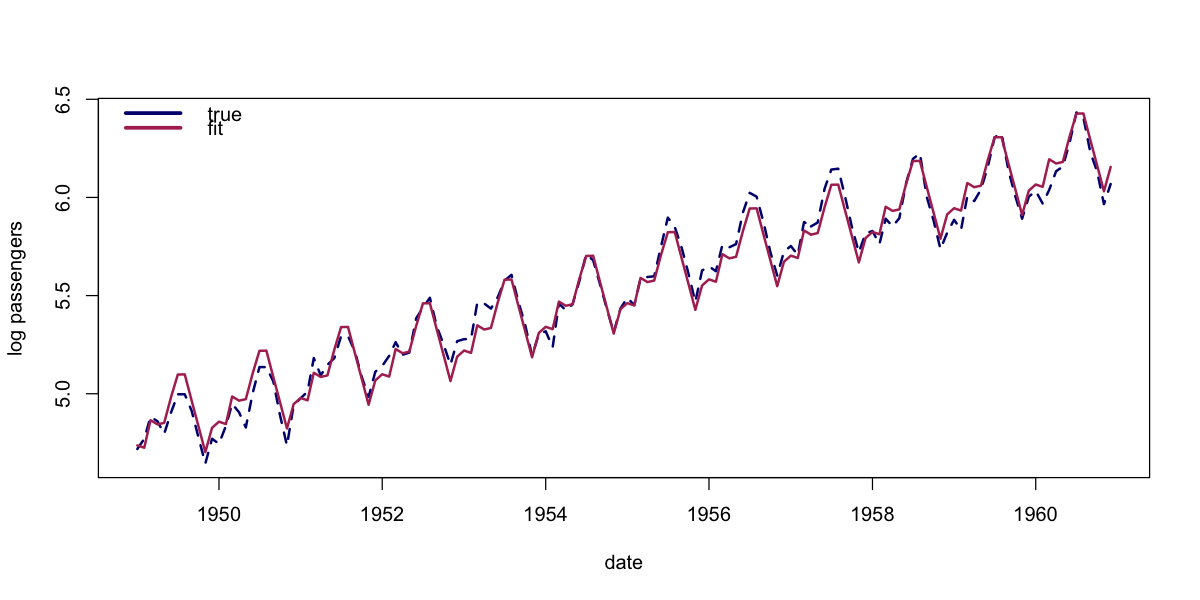

In [52]:
##Plot fitted values vs true

#Plot the actual data
plot(date, log(passengers), ylab="log passengers", type="l", col="navy", lty=2, lwd=2)
#Plot the fitted values from the air regression
lines(date, air$fitted.values, col="maroon", lwd=2)
#Add legend to the plot
legend("topleft", legend=c("true","fit"), bty="n", lwd=3, col=c("navy","maroon"))

Something interesting to note from our regression is the presence of autocorrelation. An example of this is that when the residuals are high in one month, they are often high in the next month. We can witness this autocorrelation in a plot of the regression residuals.

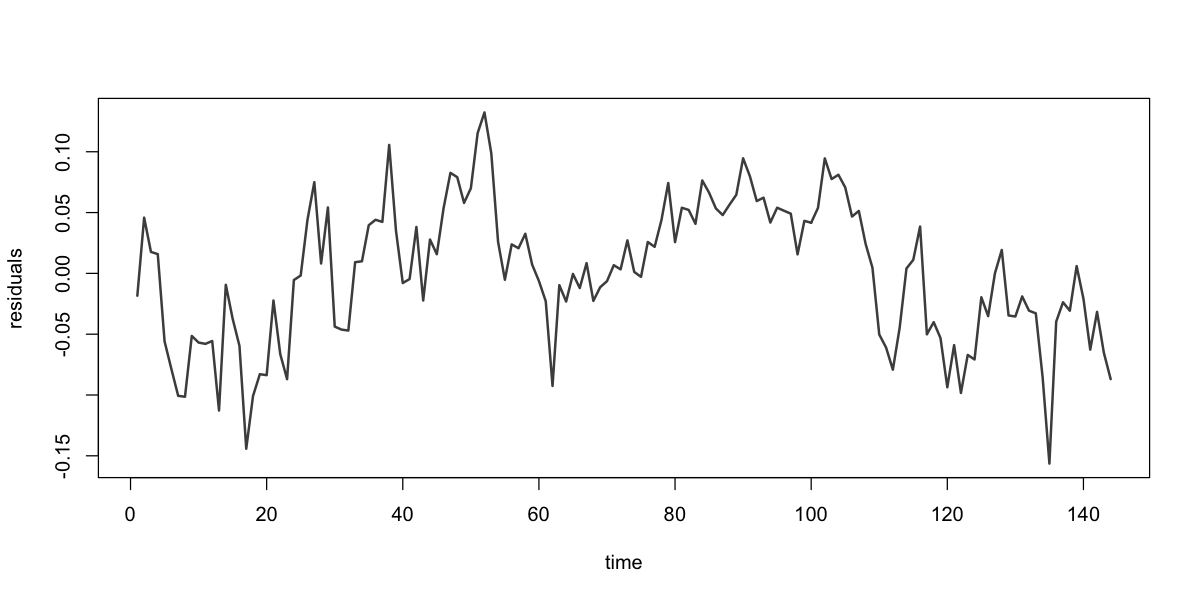

In [53]:
#Plot log-count residuals from the air regression
plot(time, air$resid, type="l", ylab="residuals", lwd=2, col="grey30")

### We can use an autocorrelation function to track the 'lag-l' correlations.

### \begin{align} acf (l) = cor(\epsilon_t,\epsilon_{t-l}) \end{align}

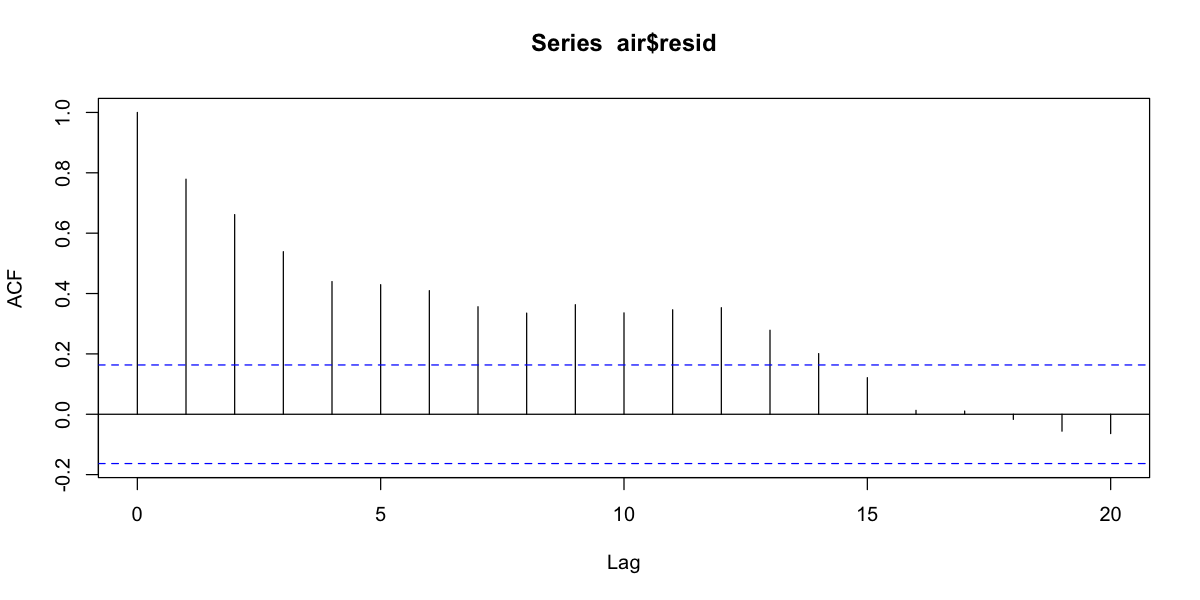

In [54]:
#Calculate acf
airac <- acf(air$resid, lag.max=20)

#Plot the acf
#plot(log(airline$Passengers), xlab="year", ylab="log monthly passengers", type="l", col=4, lwd=2, xaxt="n")
#axis(1, at=(0:12)*12, labels=1949:1961)

#note acf(0)=1 since y_t is correlated with itself

## Space and Time Regression Example 2

We will now look to build an autoregressive regression to the following spec

### \begin{align} AR(1): y_t & = \beta_0 + \beta_1 y_{t-1} + \epsilon_t \end{align}

In [55]:
#In order to run AR regression, remove first observation from data
# note: the following code removes the observation in the first index 

#The head function can be used to return all the values after the specified index (in this case all after index 1)
lag <- head(log(passengers),-1)## see help(head)
passengers <- passengers[-1] 
month <- month[-1]
time <- time[-1]

In [56]:
#perform regression
airAR <- glm(log(passengers) ~ time + month + lag)
summary(airAR)


Call:
glm(formula = log(passengers) ~ time + month + lag)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.098372  -0.020077   0.001508   0.021457   0.086081  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.0002930  0.2584022   3.871 0.000171 ***
time         0.0020576  0.0005592   3.679 0.000342 ***
month2      -0.0344936  0.0154346  -2.235 0.027149 *  
month3       0.1132505  0.0154221   7.343 2.09e-11 ***
month4      -0.0212718  0.0167987  -1.266 0.207697    
month5       0.0011799  0.0161917   0.073 0.942021    
month6       0.1252337  0.0161513   7.754 2.35e-12 ***
month7       0.1323313  0.0192501   6.874 2.40e-10 ***
month8       0.0406287  0.0231240   1.757 0.081292 .  
month9      -0.0966085  0.0227455  -4.247 4.11e-05 ***
month10     -0.1200352  0.0177417  -6.766 4.18e-10 ***
month11     -0.1541576  0.0154616  -9.970  < 2e-16 ***
month12      0.0737118  0.0168065   4.386 2.38e-05 ***
lag          0.7930716


Autocorrelations of series ‘airAR$resid’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000 -0.109  0.101  0.004 -0.121  0.076  0.099 -0.025 -0.066  0.117 -0.005 
    11     12     13     14     15     16     17     18     19     20 
 0.069  0.205  0.049  0.022  0.073 -0.204  0.046  0.009 -0.065 -0.071 


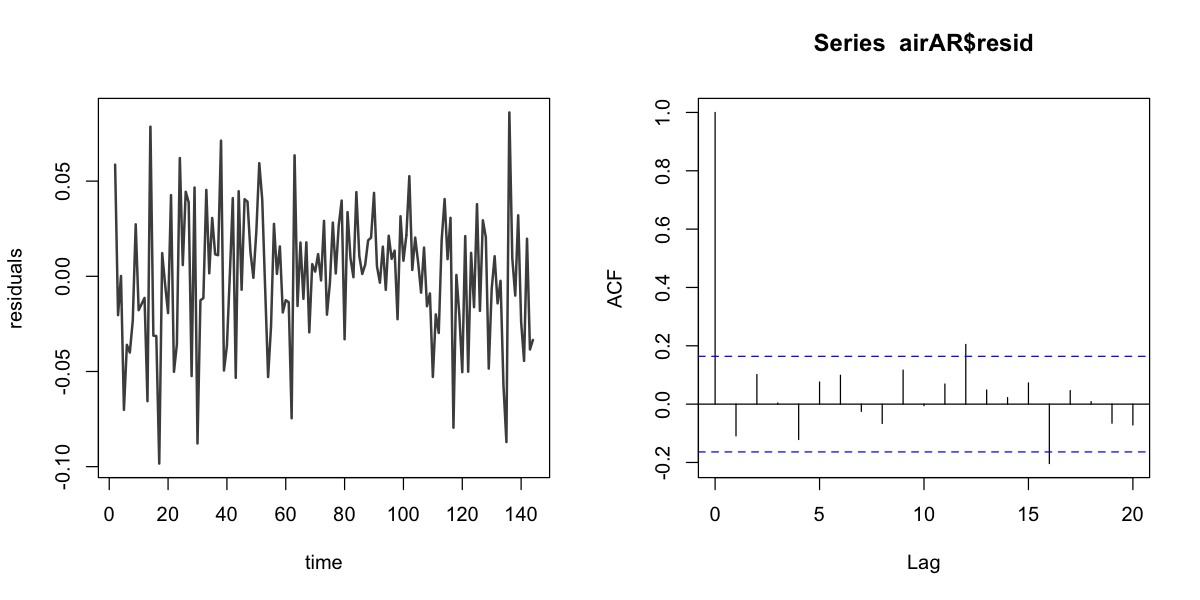

In [57]:
#Plot the residuals 
par(mfrow=c(1,2))
plot(time, airAR$resid, type="l", ylab="residuals", lwd=2, col="grey30")
print(acf(airAR$resid, lag.max=20))

## Space and Time Regression Example 3: Random Walk

In a random walk, the series wanders around maintaining a high autocorrelation for a significant amount of time. We can view this type of random walk by viewing the Dow Jones Average (DJA) composite index from 2000-2007.

In [58]:
#Import dja.csv dataset
dja <- read.csv("dja.csv")$DJ

#View a summary of dja
summary(dja)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2033    2879    3139    3254    3622    4731 

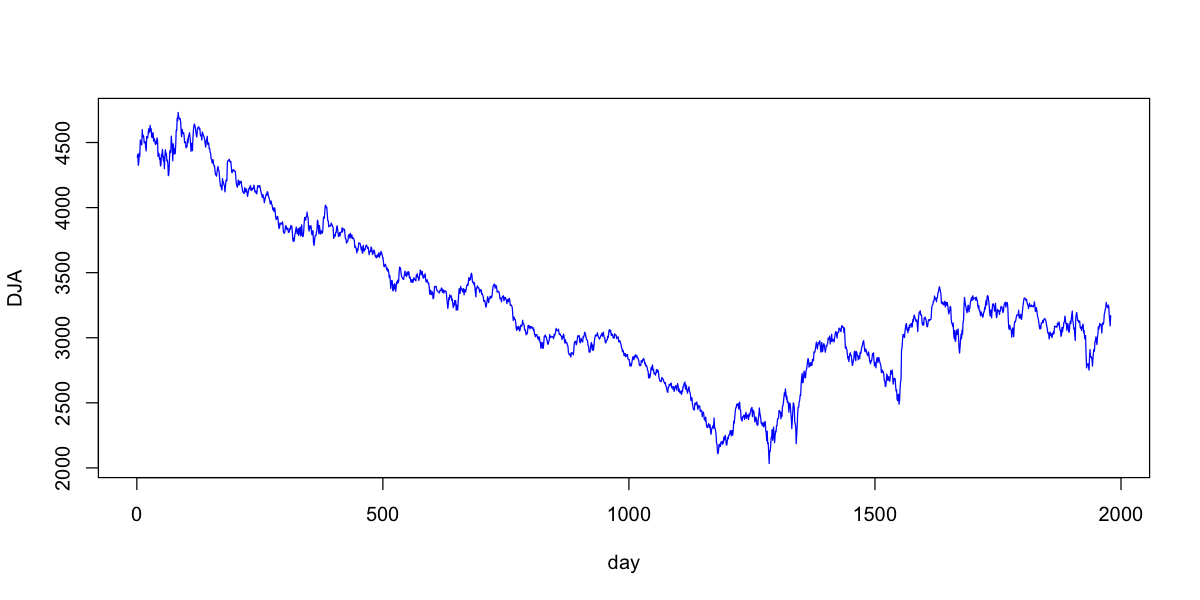

In [59]:
#Plot the dja series over time (note the time dimension is days and we are plotting the DJA prices)
plot(dja, type="l", col=4, xlab="day", ylab="DJA")

In [60]:
##Fit an AR odel and see if it confomrs to a random walk model

#Get number of observations in the vector with length function
n <- length(dja)

#Perform the regression
summary(ARdj <- glm(dja[2:n] ~ dja[1:(n-1)]))

#NOTE: the dja coefficient is roughly equal to 1 so we confirm that the model fit looks like a random walk


Call:
glm(formula = dja[2:n] ~ dja[1:(n - 1)])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-144.00   -18.55    -1.02    19.02   226.86  

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     7.05419    4.00385   1.762   0.0782 .  
dja[1:(n - 1)]  0.99764    0.00121 824.298   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 1032.185)

    Null deviance: 703375188  on 1977  degrees of freedom
Residual deviance:   2039598  on 1976  degrees of freedom
AIC: 19344

Number of Fisher Scoring iterations: 2


### Now lets focus our attentions to returns instead of prices such that

### \begin{align} Return & = (y_t - y_{t-1}) / y_{t-1} \end{align}

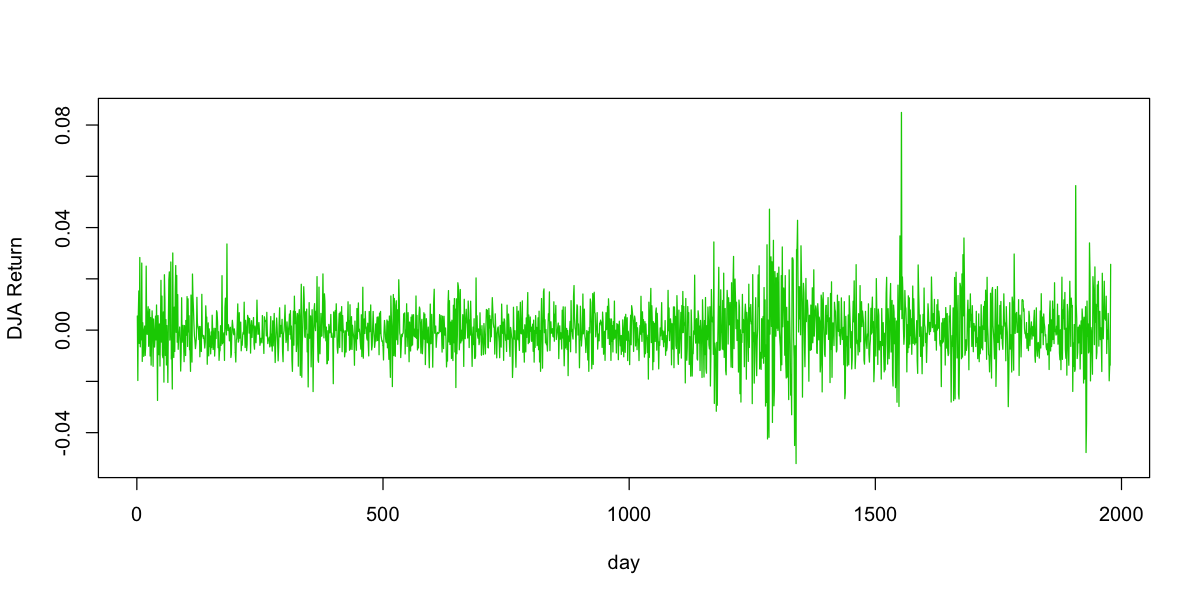

In [61]:
#Generate returns variable
returns <- (dja[2:n]-dja[1:(n-1)])/dja[1:(n-1)]

#Plot returns
plot(returns, type="l", col=3, xlab="day", ylab="DJA Return")

In [62]:
#Perform AR regression with returns
summary( glm(returns[2:n] ~ returns[1:(n-1)]) )

#NOTE: the dja coefficient is no longer close to 1 and thus a random walk model is not present


Call:
glm(formula = returns[2:n] ~ returns[1:(n - 1)])

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.052138  -0.005867  -0.000388   0.005707   0.085140  

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)
(Intercept)        -0.0001138  0.0002363  -0.482    0.630
returns[1:(n - 1)] -0.0144411  0.0225321  -0.641    0.522

(Dispersion parameter for gaussian family taken to be 0.000110363)

    Null deviance: 0.21801  on 1976  degrees of freedom
Residual deviance: 0.21797  on 1975  degrees of freedom
  (1 observation deleted due to missingness)
AIC: -12399

Number of Fisher Scoring iterations: 2


### Other Useful Plots to Understand AR models

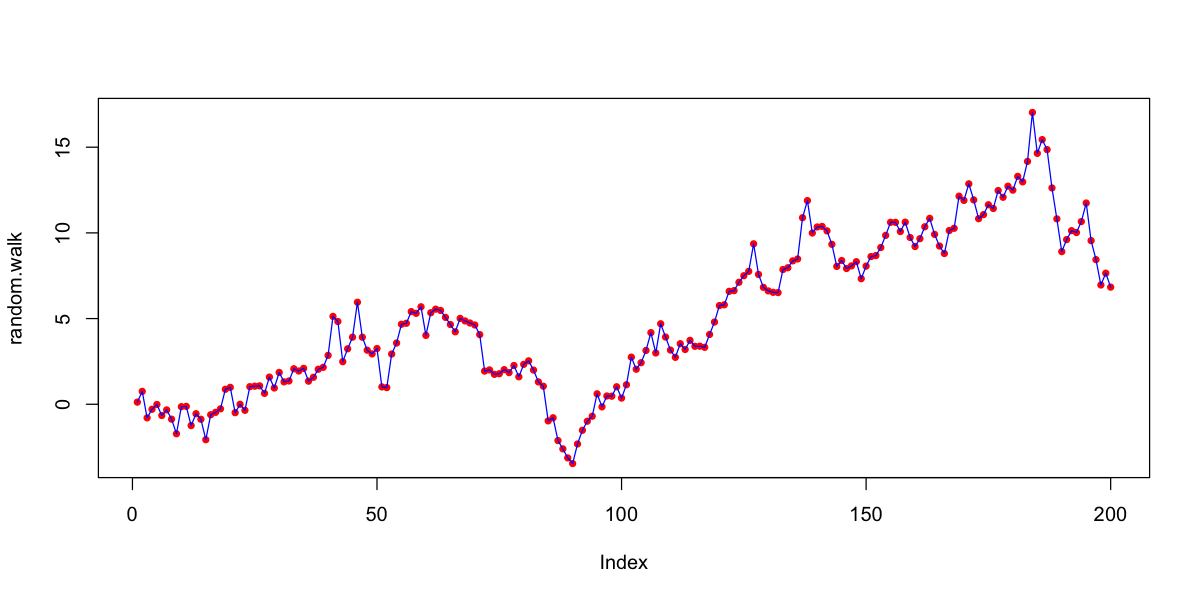

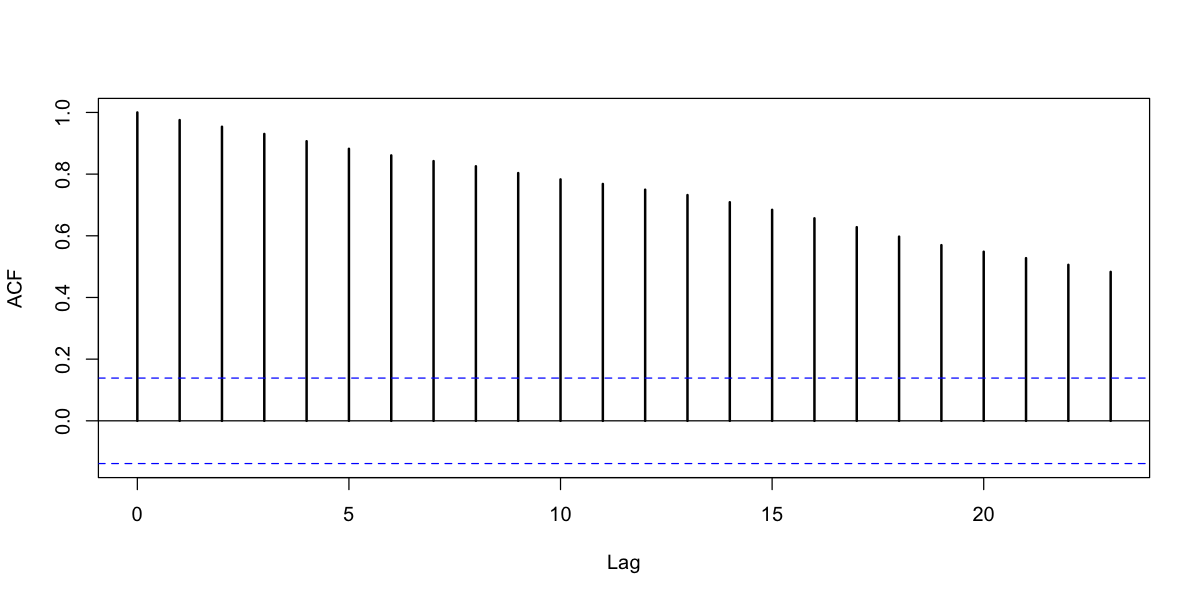

In [63]:
#Plot of a random walk
random.walk <- rnorm(1)
for(i in 2:200){
    random.walk <- c(random.walk, random.walk[i-1]+rnorm(1))
}
plot(random.walk, pch=20, col=2)
lines(random.walk, col=4)
acf(random.walk, lwd=2, main="")

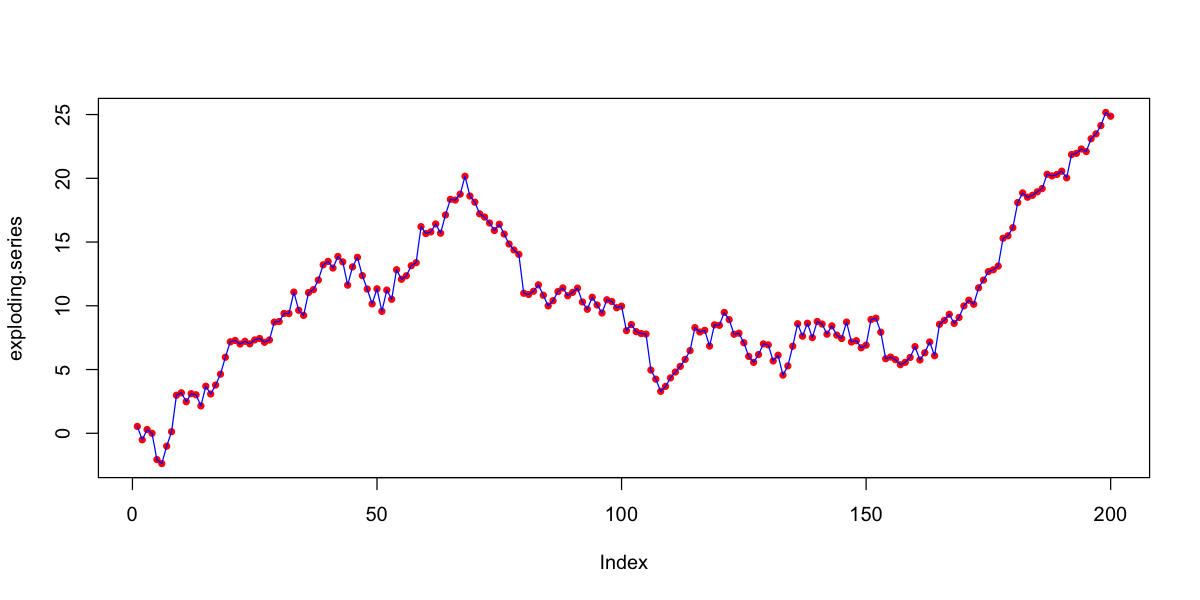

In [64]:
#Plot of an exploding series
exploding.series <- rnorm(1)
for(i in 2:200){
    exploding.series <- c(exploding.series, 1.02*exploding.series[i-1]+rnorm(1))
}
plot(exploding.series, pch=20, col=2)
lines(exploding.series, col=4)

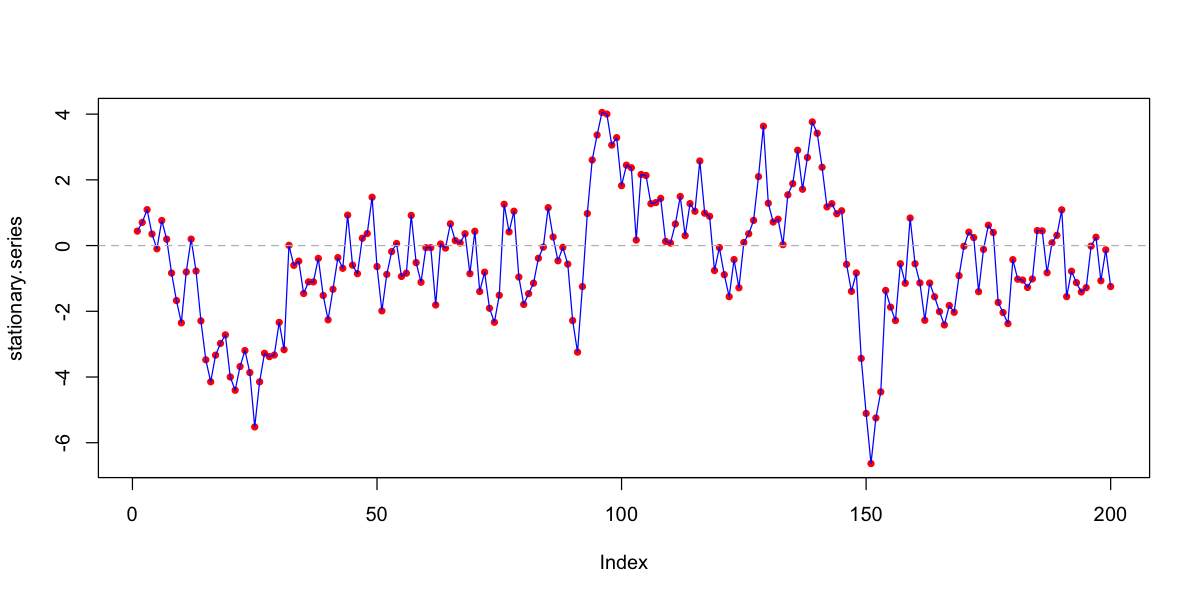

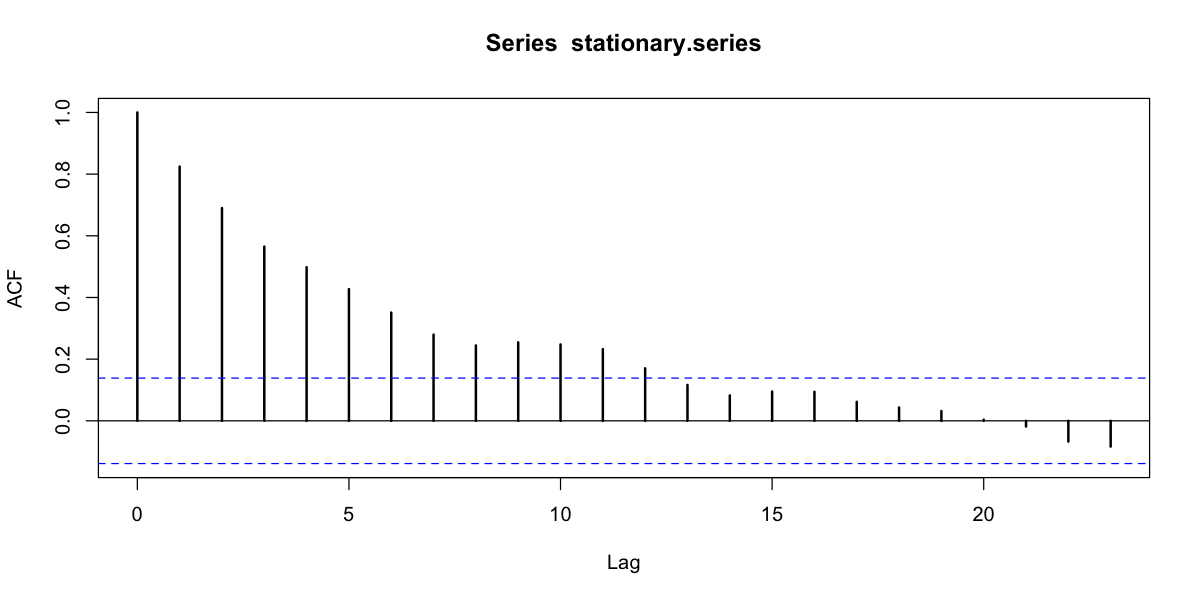

In [65]:
#Plot fo a stationary series
stationary.series <- rnorm(1)
for(i in 2:200){ stationary.series <- c(stationary.series, 0.8*stationary.series[i-1]+rnorm(1)) }
plot(stationary.series, pch=20, col=2)
lines(stationary.series, col=4)
abline(h=0, lty=2, col=8)
acf(stationary.series, lwd=2)

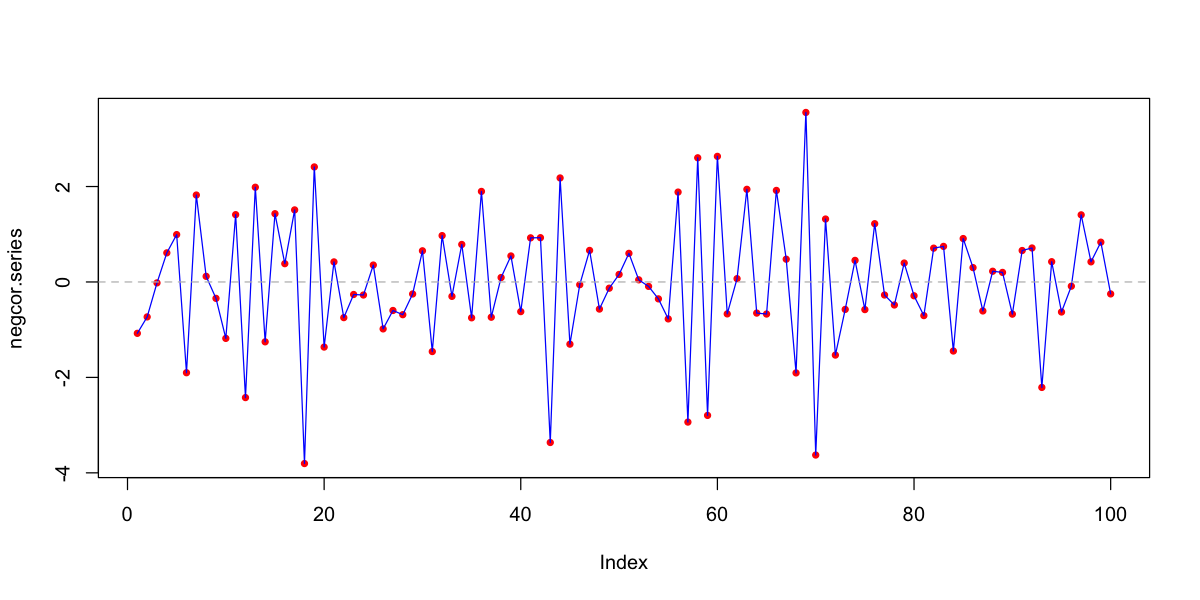

In [66]:
#Stationary series with negative correlation
negcor.series <- rnorm(1)
for(i in 2:100){ negcor.series <- c(negcor.series, -0.8*negcor.series[i-1]+rnorm(1)) }
plot(negcor.series, pch=20, col=2)
lines(negcor.series, col=4)
abline(h=0, lty=2, col=8)